# **Detecting Pneumonia Part 2 (Data Augmentation with different model)** 






### Importing libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, RandomFlip, RandomRotation, RandomContrast, InputLayer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score

### Mounting Google Drive and loading data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # The dataset is saved inside my google drive 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Laoding data

main_dir = '/content/drive/MyDrive/קורס למידה עמוקה/DATA/chest_xray' # main dataset directory

train_dir = os.path.join(main_dir, 'train')

test_dir = os.path.join(main_dir, 'test')

val_dir = os.path.join(main_dir, 'val')

train_p_dir = os.path.join(train_dir, 'PNEUMONIA')

train_n_dir = os.path.join(train_dir, 'NORMAL')

test_p_dir = os.path.join(test_dir, 'PNEUMONIA')

test_n_dir = os.path.join(test_dir, 'NORMAL')

# Extracting all file names 
train_p_files = os.listdir(train_p_dir)
train_n_files = os.listdir(train_n_dir)
test_p_files = os.listdir(test_p_dir)
test_n_files = os.listdir(test_n_dir)

print("Total images in the training set: ", len(train_p_files+train_n_files))
print("Total images in the test set: ", len(test_p_files+test_n_files))

Total images in the training set:  5216
Total images in the test set:  624


### Data preprocessing 

In [ ]:
# We will preprocess our data using ImageDataGenerator and flow_from_directory
# generate training, testing and validation batches 
batch_size = 64 

data_generate_train = ImageDataGenerator(rescale=1./255, validation_split=0.1)
data_generate_test = ImageDataGenerator(rescale=1./255)

train_batches = data_generate_train.flow_from_directory(train_dir, target_size=(224,224), color_mode='grayscale',
                                                          subset='training', batch_size=batch_size,
                                                          class_mode='binary', shuffle=True, seed=42)
validation_batches = data_generate_train.flow_from_directory(train_dir, target_size=(224,224), color_mode='grayscale',
                                                          subset='validation', batch_size=batch_size,
                                                          class_mode='binary', shuffle=True, seed=42)
test_batches = data_generate_test.flow_from_directory(test_dir, target_size=(224,224), color_mode='grayscale',
                                                          batch_size=1, class_mode='binary', shuffle=False)

# Class indices
print(f'Number of classes are: {train_batches.num_classes}')
print(f'The classes are represented as {train_batches.class_indices}')

# Image shape
print(f'Shape of training data: {train_batches.image_shape}')
print(f'Shape of validation data: {validation_batches.image_shape}')
print(f'Shape of test data: {test_batches.image_shape}')

Found 4695 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Number of classes are: 2
The classes are represented as {'NORMAL': 0, 'PNEUMONIA': 1}
Shape of training data: (224, 224, 1)
Shape of validation data: (224, 224, 1)
Shape of test data: (224, 224, 1)


###Building CNN model and training


In [ ]:
# Building CNN model
ModelCNN = Sequential()

ModelCNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1), padding='same'))
ModelCNN.add(MaxPooling2D(pool_size=(2, 2)))
ModelCNN.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
ModelCNN.add(MaxPooling2D(pool_size=(2, 2)))

ModelCNN.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
ModelCNN.add(MaxPooling2D(pool_size=(2, 2)))

ModelCNN.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
ModelCNN.add(MaxPooling2D(pool_size=(2, 2)))

ModelCNN.add(Flatten())
ModelCNN.add(Dense(64, activation="relu"))
ModelCNN.add(Dropout(0.5))
ModelCNN.add(Dense(1, activation='sigmoid'))

ModelCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
epochs = 50

ModelCNN.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-4), metrics='accuracy')

cnn_hist = ModelCNN.fit(train_batches, validation_data=validation_batches, batch_size = batch_size, epochs = epochs)

Epoch 1/50
74/74 [==============================] - 840s 11s/step - loss: 0.5592 - accuracy: 0.7353 - val_loss: 0.4406 - val_accuracy: 0.7428
Epoch 2/50
74/74 [==============================] - 86s 1s/step - loss: 0.3424 - accuracy: 0.7761 - val_loss: 0.3079 - val_accuracy: 0.8695
Epoch 3/50
74/74 [==============================] - 86s 1s/step - loss: 0.2662 - accuracy: 0.8920 - val_loss: 0.2442 - val_accuracy: 0.9021
Epoch 4/50
74/74 [==============================] - 85s 1s/step - loss: 0.2325 - accuracy: 0.8990 - val_loss: 0.2141 - val_accuracy: 0.9367
Epoch 5/50
74/74 [==============================] - 87s 1s/step - loss: 0.2246 - accuracy: 0.9146 - val_loss: 0.2170 - val_accuracy: 0.9309
Epoch 6/50
74/74 [==============================] - 86s 1s/step - loss: 0.2151 - accuracy: 0.9199 - val_loss: 0.2346 - val_accuracy: 0.9194
Epoch 7/50
74/74 [==============================] - 87s 1s/step - loss: 0.2005 - accuracy: 0.9263 - val_loss: 0.2125 - val_accuracy: 0.9309
Epoch 8/50
74/74 [

### Analyzing model preformance 

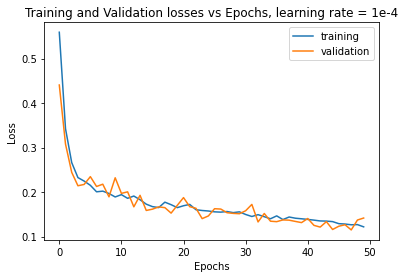

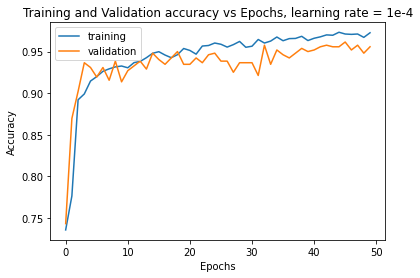

In [ ]:
# plot training and validation Loss/Accuracy vs Epochs
plt.figure(1)
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation losses vs Epochs, learning rate = 1e-4')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(2)
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation accuracy vs Epochs, learning rate = 1e-4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
test_loss, test_accuracy = ModelCNN.evaluate(test_batches)
print(f"Test accuracy: {test_accuracy*100}%, Test loss: {test_loss}")

624/624 [==============================] - 100s 161ms/step - loss: 1.0035 - accuracy: 0.8253
Test accuracy: 82.53205418586731%, Test loss: 1.003463625907898


In [ ]:
predictions_cnn = ModelCNN.predict(test_batches) # Set of probabilites
y_pred_cnn = predictions_cnn > 0.5
y_true_cnn = test_batches.classes # True labels

In [ ]:
Recall = "{:.2f}".format(recall_score(y_true_cnn, y_pred_cnn))
Precision = "{:.2f}".format(precision_score(y_true_cnn, y_pred_cnn))
print(f'Recall score is: {Recall}')
print(f'Precision score is: {Precision}')

Recall score is: 0.99
Precision score is: 0.79


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


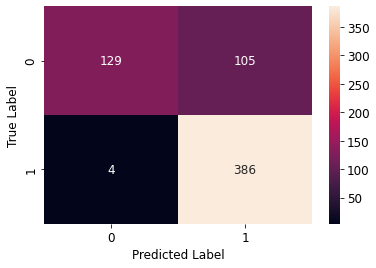

In [ ]:
import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat = confusion_matrix(y_true_cnn, y_pred_cnn)
sns.heatmap(mat, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

### Data Augmentation

In [ ]:
def get_distribution(train_n_files, train_p_files):
  #labelling the output
  labels=['Normal','Pneumonia']

  #Getting the sum of each outcome
  targets=[len(train_n_files),len(train_p_files)]

  #Plotting the piechart
  plt.style.use('ggplot')
  plt.figure(figsize=(16,9))
  plt.pie(x=targets,labels=labels,autopct="%1.1f%%")
  plt.title("Image category distribution in train directory")
  plt.show()
    

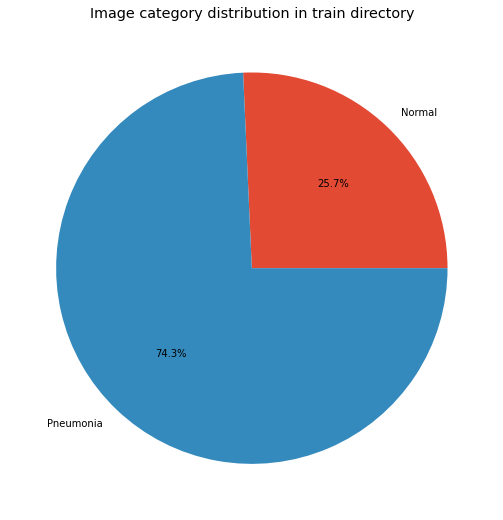

Number of healthy images: 1341
Number of sick images: 3875


In [ ]:
get_distribution(train_n_files, train_p_files)
print(f'Number of healthy images: {len(train_n_files)}')
print(f'Number of sick images: {len(train_p_files)}')

In [ ]:
# Building CNN model
ModelCNN22 = Sequential()

ModelCNN22.add(InputLayer(input_shape=(224,224,1))) # Data Augmentation inside the model
ModelCNN22.add(RandomFlip(mode='horizontal'))
ModelCNN22.add(RandomRotation(factor=(-0.2,0.2)))
ModelCNN22.add(RandomContrast(0.5,1))

ModelCNN22.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1), padding='same'))
ModelCNN22.add(MaxPooling2D(pool_size=(2, 2)))
ModelCNN22.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
ModelCNN22.add(MaxPooling2D(pool_size=(2, 2)))

ModelCNN22.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
ModelCNN22.add(MaxPooling2D(pool_size=(2, 2)))

ModelCNN22.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
ModelCNN22.add(MaxPooling2D(pool_size=(2, 2)))

ModelCNN22.add(Flatten())
ModelCNN22.add(Dense(64, activation="relu"))
ModelCNN22.add(Dropout(0.5))
ModelCNN22.add(Dense(1, activation='sigmoid'))

ModelCNN22.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 1)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 1)      0         
 tion)                                                           
                                                                 
 random_contrast (RandomCont  (None, 224, 224, 1)      0         
 rast)                                                           
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                        

In [ ]:
epochs = 50

ModelCNN22.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-5), metrics='accuracy')

cnn_hist22 = ModelCNN22.fit(train_batches, validation_data=validation_batches, batch_size = batch_size, epochs = epochs)

Epoch 1/50
74/74 [==============================] - 76s 926ms/step - loss: 0.6227 - accuracy: 0.7184 - val_loss: 0.5782 - val_accuracy: 0.7428
Epoch 2/50
74/74 [==============================] - 70s 953ms/step - loss: 0.5881 - accuracy: 0.7429 - val_loss: 0.5729 - val_accuracy: 0.7428
Epoch 3/50
74/74 [==============================] - 65s 881ms/step - loss: 0.5849 - accuracy: 0.7429 - val_loss: 0.5682 - val_accuracy: 0.7428
Epoch 4/50
74/74 [==============================] - 66s 890ms/step - loss: 0.5765 - accuracy: 0.7429 - val_loss: 0.5589 - val_accuracy: 0.7428
Epoch 5/50
74/74 [==============================] - 69s 926ms/step - loss: 0.5661 - accuracy: 0.7429 - val_loss: 0.5475 - val_accuracy: 0.7428
Epoch 6/50
74/74 [==============================] - 68s 912ms/step - loss: 0.5530 - accuracy: 0.7429 - val_loss: 0.5340 - val_accuracy: 0.7428
Epoch 7/50
74/74 [==============================] - 73s 985ms/step - loss: 0.5396 - accuracy: 0.7431 - val_loss: 0.5134 - val_accuracy: 0.7428

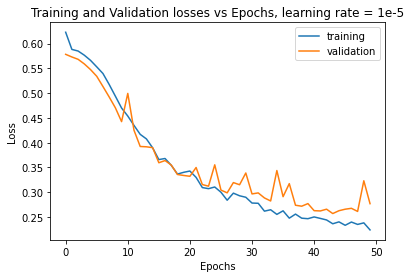

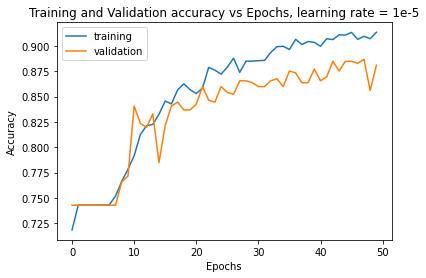

In [ ]:
# plot training and validation Loss/Accuracy vs Epochs
plt.figure(1)
plt.plot(cnn_hist22.history['loss'])
plt.plot(cnn_hist22.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation losses vs Epochs, learning rate = 1e-5')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(2)
plt.plot(cnn_hist22.history['accuracy'])
plt.plot(cnn_hist22.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation accuracy vs Epochs, learning rate = 1e-5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

we have overfitting

In [ ]:
# Building CNN model
ModelCNN3 = Sequential()

ModelCNN3.add(InputLayer(input_shape=(224,224,1)))
ModelCNN3.add(RandomFlip(mode='horizontal'))
ModelCNN3.add(RandomRotation(factor=(-0.2,0.2)))
ModelCNN3.add(RandomContrast(factor=(0.5,1)))

ModelCNN3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,1), padding='same'))
ModelCNN3.add(MaxPooling2D(pool_size=(2, 2)))
ModelCNN3.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
ModelCNN3.add(MaxPooling2D(pool_size=(2, 2)))

ModelCNN3.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
ModelCNN3.add(MaxPooling2D(pool_size=(2, 2)))

ModelCNN3.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
ModelCNN3.add(BatchNormalization())
ModelCNN3.add(MaxPooling2D(pool_size=(2, 2)))
ModelCNN3.add(Dropout(0.5))

ModelCNN3.add(Flatten())
ModelCNN3.add(Dense(64, activation="relu"))
ModelCNN3.add(Dropout(0.5))
ModelCNN3.add(Dense(1, activation='sigmoid'))

ModelCNN3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 1)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 1)      0         
 tion)                                                           
                                                                 
 random_contrast (RandomCont  (None, 224, 224, 1)      0         
 rast)                                                           
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                        

In [ ]:
epochs = 50

ModelCNN3.compile(loss='binary_crossentropy', optimizer = Adam(learning_rate=1e-5), metrics='accuracy')

cnn_hist3 = ModelCNN3.fit(train_batches, validation_data=validation_batches, batch_size = batch_size, epochs = epochs)

Epoch 1/50
74/74 [==============================] - 75s 988ms/step - loss: 0.5927 - accuracy: 0.7120 - val_loss: 0.6789 - val_accuracy: 0.7831
Epoch 2/50
74/74 [==============================] - 70s 939ms/step - loss: 0.4655 - accuracy: 0.7791 - val_loss: 0.6637 - val_accuracy: 0.8560
Epoch 3/50
74/74 [==============================] - 72s 974ms/step - loss: 0.4009 - accuracy: 0.8215 - val_loss: 0.6198 - val_accuracy: 0.8369
Epoch 4/50
74/74 [==============================] - 70s 951ms/step - loss: 0.3690 - accuracy: 0.8358 - val_loss: 0.5757 - val_accuracy: 0.8618
Epoch 5/50
74/74 [==============================] - 71s 956ms/step - loss: 0.3276 - accuracy: 0.8550 - val_loss: 0.4960 - val_accuracy: 0.8580
Epoch 6/50
74/74 [==============================] - 71s 952ms/step - loss: 0.2992 - accuracy: 0.8703 - val_loss: 0.4239 - val_accuracy: 0.8810
Epoch 7/50
74/74 [==============================] - 72s 967ms/step - loss: 0.2925 - accuracy: 0.8737 - val_loss: 0.3670 - val_accuracy: 0.9021

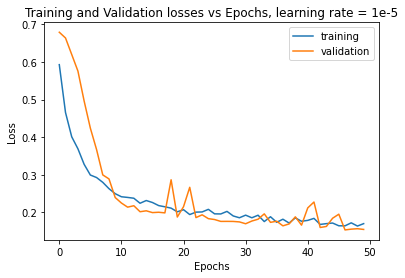

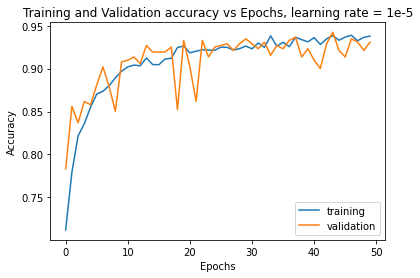

In [ ]:
# plot training and validation Loss/Accuracy vs Epochs
plt.figure(1)
plt.plot(cnn_hist3.history['loss'])
plt.plot(cnn_hist3.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation losses vs Epochs, learning rate = 1e-5')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.figure(2)
plt.plot(cnn_hist3.history['accuracy'])
plt.plot(cnn_hist3.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation accuracy vs Epochs, learning rate = 1e-5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
test_loss3, test_accuracy3 = ModelCNN3.evaluate(test_batches)
print(f"Test accuracy: {test_accuracy3*100}%, Test loss: {test_loss3}")

624/624 [==============================] - 10s 16ms/step - loss: 0.4619 - accuracy: 0.8349
Test accuracy: 83.49359035491943%, Test loss: 0.4618802070617676


In [ ]:
predictions_cnn3 = ModelCNN3.predict(test_batches) # Set of probabilites
y_pred_cnn3 = predictions_cnn3 > 0.5
y_true_cnn3 = test_batches.classes # True labels

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


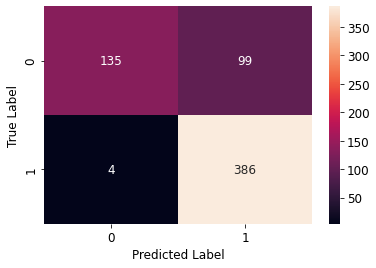

In [ ]:
import seaborn as sns

font = {
    'family': 'Times New Roman',
    'size': 12
}
plt.rc('font', **font)
mat3 = confusion_matrix(y_true_cnn3, y_pred_cnn3)
sns.heatmap(mat3, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [ ]:
Recall = "{:.2f}".format(recall_score(y_true_cnn3,y_pred_cnn3))
Precision = "{:.2f}".format(precision_score(y_true_cnn3,y_pred_cnn3))
print(f'Recall score is: {Recall}')
print(f'Precision score is: {Precision}')

Recall score is: 0.99
Precision score is: 0.80


In [ ]:
keras.backend.clear_session() # run it before ___.fit command